In [2]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


Veri Setimiz keras kütüphanesinde hali hazırda tanımlı.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Normalizasyon

In [4]:
x_train = (x_train.astype(np.float32)-127.5)/127.5

In [6]:
print(x_train.shape)

(60000, 28, 28)


Veri setimizi yeniden boyutlandırıyoruz.

In [7]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])

In [8]:
print(x_train.shape)

(60000, 784)


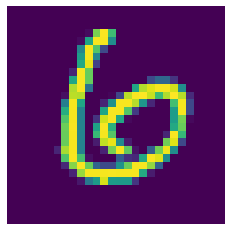

In [10]:
plt.imshow(x_test[11])
plt.axis('off')
plt.show()

Üretici Model Oluşturma

In [18]:
def create_generator():
  generator = Sequential()
  generator.add(Dense(units=512, input_dim= 100))
  generator.add(ReLU())
  generator.add(Dense(units=512))
  generator.add(ReLU())
  generator.add(Dense(units=1024))
  generator.add(ReLU())
  generator.add(Dense(units=784 ,activation='tanh'))

  generator.compile(loss='binary_crossentropy',optimizer  =Adam(lr = 0.0001,beta_1 = 0.5))

  return generator


In [19]:
g = create_generator()
g.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               51712     
_________________________________________________________________
re_lu_6 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_7 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              525312    
_________________________________________________________________
re_lu_8 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 784)              

Ayrımcı model 

In [21]:
def create_discriminator():

  discriminator = Sequential()
  discriminator.add(Dense(units=1024, input_dim= 784))
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.4))

  discriminator.add(Dense(units=512))
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.4))

  discriminator.add(Dense(units=256))
  discriminator.add(ReLU())

  discriminator.add(Dense(units=1, activation='sigmoid'))

  discriminator.compile(loss='binary_crossentropy',optimizer  =Adam(lr = 0.0001,beta_1 = 0.5))
  
  return discriminator







In [22]:
d = create_discriminator()
d.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1024)              803840    
_________________________________________________________________
re_lu_9 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
re_lu_10 (ReLU)              (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)              

GAN'S

In [23]:
def create_gan(discriminator, generator):
  discriminator.trainable = False
  gan_input = Input(shape=(100,))
  x=generator(gan_input)
  gan_output = discriminator(x)
  gan = Model( inputs = gan_input , outputs = gan_output)
  gan.compile(loss='binary_crossentropy',optimizer='adam')
  return gan

In [24]:
gan = create_gan(d,g)
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 784)               1643280   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 1460225   
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


In [27]:
epochs= 50
batch_size = 256

for i in range(epochs):
  for _ in range(batch_size):
    noise = np.random.normal(0,1,[batch_size,100])
    generated_images = g.predict(noise)

    image_batch  = x_train[np.random.randint(low = 0, high= x_train.shape[0], size= batch_size)]

    x = np.concatenate([image_batch,generated_images])
    
    y_dis = np.zeros(batch_size*2)
    y_dis[:batch_size] = 1

    d.trainable = True
    d.train_on_batch(x,y_dis)
    noise = np.random.normal(0,1,[batch_size,100])
    y_gen = np.ones(batch_size)
    d.trainable  =False
     
    gan.train_on_batch(noise, y_gen)

  print('epoch:' ,i)


epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
